In [54]:
#import sys
#!{sys.executable} -m pip install ipywidgets
import pickle
import ipywidgets as widgets
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import VimeoVideo
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
cc=pd.read_csv('creditcard.csv')
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


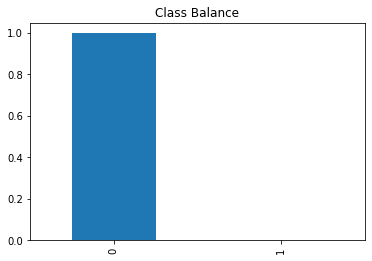

In [23]:
##check class balance
cc['Class'].value_counts(normalize=True).plot(kind='bar', title='Class Balance');

In [19]:
#check for null values
if all(map(lambda x: x==0, cc.isnull().sum().values)):
    print("There are no null values in the dataset")

There are no null values in the dataset


### Lets explore the distribution of amount

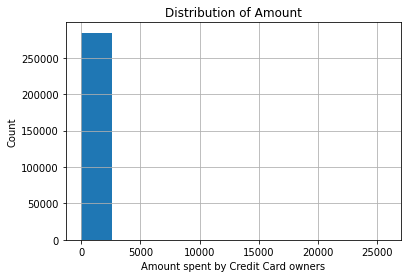

In [28]:
cc['Amount'].hist()
plt.xlabel("Amount spent by Credit Card owners")
plt.ylabel("Count"),
plt.title("Distribution of Amount");

### The Amount column is very skewed. Let's try normalizing it

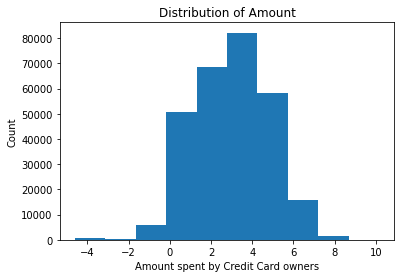

In [34]:
plt.hist(np.where(cc['Amount']!=0,np.log(cc['Amount']),0))
plt.xlabel("Amount spent by Credit Card owners")
plt.ylabel("Count"),
plt.title("Distribution of Amount");

### That looks much better. Next, I will replace the Amount column with the normalized values

In [40]:
cc['Amount'] = np.where(cc['Amount']!=0,np.log(cc['Amount']),0)
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008099,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989541,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816241,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248352,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.261365,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210440,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217741,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.302585,0


In [44]:
y = cc["Class"]
X = cc.drop(columns="Class")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

### The baseline accuracy below is the minimum our model must achieve to be considered 'good'.

In [50]:
acc_baseline = y_train.value_counts(normalize=True)[0]
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9983


In [51]:
# Fit on `X_train`, `y_train`
model_reg = GradientBoostingClassifier()
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = GradientBoostingClassifier()
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = GradientBoostingClassifier()
model_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier()

### Now that we have three models trained on the regular, oversampled and undersampled training data, which one is the winner?

In [52]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)
    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9992
Test Accuracy: 0.9989
Training Accuracy: 0.9608
Test Accuracy: 0.9612
Training Accuracy: 0.9931
Test Accuracy: 0.9929


#### The regular training data seems to be performing better. The model trained on the undersampled data did not meet the baseline, so I'll just discard it. On the other hand, the model trained on the oversampled data did well but we may get better results with cross validation.

In [55]:
cv_acc_scores = cross_val_score(model_over, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99457029 0.99260285 0.99528468 0.99367993 0.99517476]


### Not bad, but could be better. Maybe a grid search would improve the accuracy even better

In [56]:
'''Parameter Grid to get best performance'''
params = {
    "n_estimators": range(25, 100, 25),
    "max_depth": range(10, 50, 10)
}
model = GridSearchCV(
    model_over,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [57]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [62]:
model.score(X_test, y_test)

0.9995435553526912

### Our model achieved a near perfect accuracy on the training and test set. Below are predictions from the test set

In [65]:
pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)}).reset_index()

,index,Actual,Predicted
0,43428,1,1
1,49906,0,0
2,29474,0,0
3,276481,0,0
4,278846,0,0
...,...,...,...
56957,75723,0,0
56958,252263,0,0
56959,221246,0,0
56960,81910,0,0


##### Overall, this model did a good job.